In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import metrics
import statistics
import copy
import math
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import seaborn as sns
import gplearn

In [2]:
dataset = pd.read_excel(r"C:\Users\thewa\OneDrive\Documents\MTF 2022-2023 Qualifier\11428_0_teams_1664311385.xlsx")
dataset

pop = pd.read_csv(r"C:\Users\thewa\OneDrive\Documents\MTF 2022-2023 Qualifier\API_SP.POP.TOTL_DS2_en_csv_v2_4701113.csv")
pop = pop[pop["Country Name"] == "United States"].loc[:, [str(i+1999) for i in range(22)]]
pop


1999         2000         2001         2002         2003  \
251  279040000.0  282162411.0  284968955.0  287625193.0  290107933.0   

            2004         2005         2006         2007         2008  ...  \
251  292805298.0  295516599.0  298379912.0  301231207.0  304093966.0  ...   

            2011         2012         2013         2014         2015  \
251  311583481.0  313877662.0  316059947.0  318386329.0  320738994.0   

            2016         2017         2018         2019         2020  
251  323071755.0  325122128.0  326838199.0  328329953.0  331501080.0  

[1 rows x 22 columns]

Problem 10

In [3]:
types = dataset["Cause of Death"]
types = np.unique(types)

yeartotal = {}

for type in types:
    yeartotal[type] = []
    for year in range(1999, 2021):
        summ = sum(dataset[dataset["Year"] == year][dataset["Cause of Death"] == type]["Deaths"])
        yeartotal[type].append(summ)

avg = {}

for key in yeartotal.keys():
    avg[key] = sum(yeartotal[key])/22

order = list(avg.values())
order.sort(reverse=True)

order = order[0:10]

for key in yeartotal.keys():
    if order.count(avg[key]) > 0:
        print([key, avg[key]])

C:\Users\thewa\AppData\Local\Temp\ipykernel_22120\1038743008.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  summ = sum(dataset[dataset["Year"] == year][dataset["Cause of Death"] == type]["Deaths"])


['Accidents (unintentional injuries) (V01-X59,Y85-Y86)', 263587.95454545453]
["Alzheimer's disease (G30)", 100142.40909090909]
['Cerebrovascular diseases (I60-I69)', 243468.45454545456]
['Chronic lower respiratory diseases (J40-J47)', 255405.63636363635]
['Diseases of heart (I00-I09,I11,I13,I20-I51)', 1309061.0909090908]
['Influenza and pneumonia (J09-J18)', 143627.86363636365]
['Intentional self-harm (suicide) (*U03,X60-X84,Y87.0)', 68533.09090909091]
['Malignant neoplasms (C00-C97)', 1045435.9090909091]
['Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)', 73092.90909090909]
['Transport accidents (V01-V99,Y85)', 71521.31818181818]


Problem 12

In [4]:
inf2015 = yeartotal["Influenza and pneumonia (J09-J18)"][16]
sum2015 = 0
for key in yeartotal.keys():
    sum2015 += yeartotal[key][16]
    
print(inf2015)
sum2015

149081


3966049

Problem 13

In [5]:
nyresp = list(dataset.loc[dataset["State"] == "New York"].loc[dataset["Cause of Death"] == 'Chronic lower respiratory diseases (J40-J47)']["Deaths"])
nyrespsort = copy.deepcopy(nyresp)

sumnyresp = sum(nyresp)
nyrespsort.sort(reverse = True)
print(nyresp.index(nyrespsort[0]) + 1999)
print(nyresp)
print(nyrespsort)
print(sumnyresp)
nyrespsort[0]/sumnyresp


1999
[12866, 12366, 12482, 12688, 12082, 12276, 12338, 11412, 11924, 12474, 12228, 12216, 12428, 12576, 12556, 11962, 12680, 12084, 12864, 12806, 12408, 11386]
[12866, 12864, 12806, 12688, 12680, 12576, 12556, 12482, 12474, 12428, 12408, 12366, 12338, 12276, 12228, 12216, 12084, 12082, 11962, 11924, 11412, 11386]
271102


0.04745815228216686

Problem 14

In [6]:
totaldeaths = 0
for key in yeartotal.keys():
    totaldeaths += sum(yeartotal[key])

totalcancer = sum(yeartotal["Malignant neoplasms (C00-C97)"])
print(totalcancer)
print(totaldeaths)
totalcancer/totaldeaths


22999590
86334877


0.26639975406462907

Problem 16

In [7]:
var2016 = []
for key in yeartotal.keys():
    var2016.append(yeartotal[key][17])

sum2016 = sum(var2016)

sort2016 = copy.deepcopy(var2016)
sort2016.sort(reverse = True)
sort2016 = sort2016[:6]
key2016 = []

other2016 = sum2016 - sum(sort2016)

for val in sort2016:
    key2016.append(list(yeartotal.keys())[var2016.index(val)])

for i in range(6):
    print(key2016[i] + ": " + str(sort2016[i]) + ' (' + str(round(sort2016[i]/sum2016*100, 2)) + ")")
print("Other: " + str(other2016) + ' (' + str(round(other2016/sum2016*100, 2)) + ")")


Diseases of heart (I00-I09,I11,I13,I20-I51): 1201977 (30.08)
Malignant neoplasms (C00-C97): 1074913 (26.9)
Accidents (unintentional injuries) (V01-X59,Y85-Y86): 342324 (8.57)
Chronic lower respiratory diseases (J40-J47): 281362 (7.04)
Cerebrovascular diseases (I60-I69): 235986 (5.91)
Influenza and pneumonia (J09-J18): 138611 (3.47)
Other: 720511 (18.03)


Problem 17

In [8]:
yearmaxlist = {}

conditions = []

for year in range(1999, 2021):
    yearmaxlist[year] = []
    yearval = []
    for type in types:
        yearval.append(sum(dataset[dataset["Year"] == year][dataset["Cause of Death"] == type]["Deaths"]))
    yearvalsort = copy.deepcopy(yearval)
    yearvalsort.sort(reverse = True)
    
    for val in yearvalsort[:10]:
        yearmaxlist[year].append([types[yearval.index(val)], val])
        conditions.append(types[yearval.index(val)])

for year in yearmaxlist.keys():
    print(str(year) + ": ")
    for val in yearmaxlist[year]:
        print(val[0] + ": " + str(val[1]))

conditions = set(conditions)
for condition in conditions:
    print(condition)

C:\Users\thewa\AppData\Local\Temp\ipykernel_22120\1981586856.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  yearval.append(sum(dataset[dataset["Year"] == year][dataset["Cause of Death"] == type]["Deaths"]))


1999: 
Diseases of heart (I00-I09,I11,I13,I20-I51): 1595439
Malignant neoplasms (C00-C97): 1016170
Cerebrovascular diseases (I60-I69): 280277
Chronic lower respiratory diseases (J40-J47): 229368
Accidents (unintentional injuries) (V01-X59,Y85-Y86): 168990
Influenza and pneumonia (J09-J18): 149622
Transport accidents (V01-V99,Y85): 77408
Diabetes mellitus (E10-E14): 61652
Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27): 56768
Alzheimer's disease (G30): 56251
2000: 
Diseases of heart (I00-I09,I11,I13,I20-I51): 1554921
Malignant neoplasms (C00-C97): 1022223
Cerebrovascular diseases (I60-I69): 278968
Chronic lower respiratory diseases (J40-J47): 225586
Accidents (unintentional injuries) (V01-X59,Y85-Y86): 169345
Influenza and pneumonia (J09-J18): 153688
Transport accidents (V01-V99,Y85): 78066
Diabetes mellitus (E10-E14): 62620
Alzheimer's disease (G30): 61786
Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27): 59686
2001: 
Diseases of heart (I00-I0

Problem 18

All at once

[3959964, 3940812, 3926369, 3947062, 3922346, 3811308, 3857148, 3777485, 3744691, 3796110, 3714204, 3727856, 3763372, 3769084, 3818500, 3845982, 3966049, 3995684, 4077363, 4086055, 4080439, 4806994]


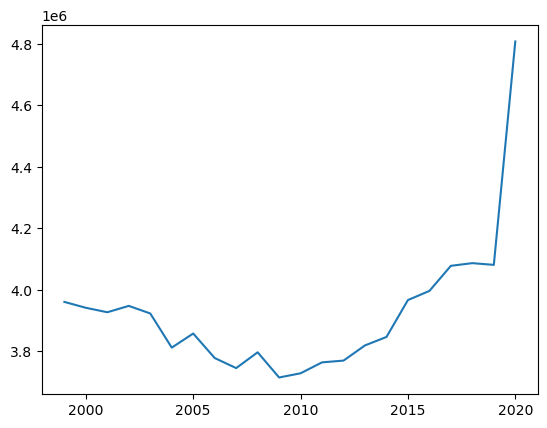

In [9]:
deathsyear = []
years = []
for year in range(1999, 2021):
    years.append(year)
    deathsyear.append(sum(list(dataset.loc[dataset["Year"] == year]["Deaths"])))

print(deathsyear)



plt.plot(years, deathsyear)
plt.show()

By Condition

In [27]:

deathsyearcond = {}
for key in yeartotal.keys():
    cond = []
    for year in range(1999, 2021):
        cond.append(yeartotal[key][year-1999])
    deathsyearcond[key] = cond
print(deathsyearcond)

fig = make_subplots(rows=35, cols=1, subplot_titles=list(yeartotal.keys()))

for sub in range(35):
    fig.add_trace(go.Scatter(x=years, y=deathsyearcond[list(deathsyearcond.keys())[sub]]), row=sub+1, col=1)
fig.update_layout(height=10000, width=600)
fig.show()

fig = make_subplots(rows=1, cols=1, subplot_titles=["Top 10 Causes of Death over Time"])

keys = ["Accidents (unintentional injuries) (V01-X59,Y85-Y86)", "Alzheimer's disease (G30)", 'Cerebrovascular diseases (I60-I69)','Chronic lower respiratory diseases (J40-J47)','Diseases of heart (I00-I09,I11,I13,I20-I51)', 'Influenza and pneumonia (J09-J18)', 'Intentional self-harm (suicide) (*U03,X60-X84,Y87.0)', 'Malignant neoplasms (C00-C97)', 'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)', 'Transport accidents (V01-V99,Y85)']
for key in keys:
    fig.add_trace(go.Scatter(x=years, y=deathsyearcond[key], name = key), row=1, col=1)

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="",
    y=1.02,
    xanchor="right",
    x=1
))

fig.show()


{'Accidents (unintentional injuries) (V01-X59,Y85-Y86)': [168990, 169345, 178578, 191136, 199376, 206911, 219737, 230508, 240401, 245412, 241335, 251371, 265794, 267344, 275602, 289163, 311458, 342324, 362318, 353456, 366099, 422277], 'Acute and subacute endocarditis (I33)': [775, 844, 852, 814, 935, 889, 843, 867, 871, 852, 853, 764, 877, 867, 950, 1012, 1059, 1192, 1190, 1345, 1316, 1409], "Alzheimer's disease (G30)": [56251, 61786, 66532, 71570, 76640, 78494, 85047, 85968, 88165, 95960, 92464, 98003, 100031, 99201, 101249, 109533, 126111, 132368, 139033, 141072, 141419, 156236], 'Anemias (D50-D64)': [3358, 3426, 3514, 3410, 3463, 3417, 3450, 2955, 3702, 3862, 3525, 3714, 3803, 3951, 3779, 3990, 4011, 4053, 4093, 3972, 3985, 4208], 'Assault (homicide) (*U01-*U02,X85-Y09,Y87.1)': [17167, 16561, 22527, 17242, 17323, 17182, 17446, 17602, 17718, 17682, 16519, 15620, 15432, 15592, 14952, 14662, 15933, 17214, 17418, 16713, 16302, 19822], 'COVID-19 (U07.1)': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

ValueError: 
    Invalid value of type 'builtins.str' received for the 'yanchor' property of layout.legend
        Received value: ''

    The 'yanchor' property is an enumeration that may be specified as:
      - One of the following enumeration values:
            ['auto', 'top', 'middle', 'bottom']

In [11]:
for key in deathsyearcond.keys():
    print(key)

Accidents (unintentional injuries) (V01-X59,Y85-Y86)
Acute and subacute endocarditis (I33)
Alzheimer's disease (G30)
Anemias (D50-D64)
Assault (homicide) (*U01-*U02,X85-Y09,Y87.1)
COVID-19 (U07.1)
Cerebrovascular diseases (I60-I69)
Certain other intestinal infections (A04,A07-A09)
Cholelithiasis and other disorders of gallbladder (K80-K82)
Chronic liver disease (K35-K74)
Chronic lower respiratory diseases (J40-J47)
Complications of medical and surgical care (Y40-Y84,Y88)
Congenital malformations, deformations and chromosomal abnormalities (Q00-Q99)
Diabetes mellitus (E10-E14)
Diseases of heart (I00-I09,I11,I13,I20-I51)
Diseases of pericardium and acute myocarditis (I30-I31,I40)
Enterocolitis due to Clostridium difficile (A04.7)
Heart failure (I50)
Human immunodeficiency virus (HIV) disease (B20-B24)
Inflammatory diseases of female pelvic organs (N70-N76)
Influenza and pneumonia (J09-J18)
Intentional self-harm (suicide) (*U03,X60-X84,Y87.0)
Legal intervention (Y35,Y89.0)
Malignant neopl

Accident Regression

In [12]:
xval = np.asarray([i for i in range(22)])
yval = np.asarray(deathsyearcond['Accidents (unintentional injuries) (V01-X59,Y85-Y86)'][:22])

m, b = np.polyfit(xval, yval, 1)
ypred = m*xval + b

print([m, b])
print("MAE: " + str(np.average(np.abs(yval - ypred))))
print("RMSE: " + str(np.sqrt(np.mean((yval - ypred) ** 2))))
print(metrics.r2_score(yval, ypred))

fig = make_subplots(rows = 1, cols = 1)

fig.add_trace(go.Scatter(x=xval, y=yval,
                    mode='markers',
                    name='Actual'))

fig.add_trace(go.Scatter(x=xval, y=ypred,
                    mode='lines+markers',
                    name='Predicted'))

fig.update_layout(title = "Accidents (unintentional injuries) (V01-X59,Y85-Y86)")
fig.update_layout(height=400, width=800)

fig.show()

[10588.78543195935, 152405.70750988135]
MAE: 11889.257635645
RMSE: 16110.593300240538
0.9456149872290022


In [51]:
figreal = make_subplots(rows = len(deathsyearcond.keys()), cols = 1, subplot_titles=list(deathsyearcond.keys()))
figres = make_subplots(rows = len(deathsyearcond.keys()), cols = 2)
c = 0
sse = {}
allpred = {}

for cond in deathsyearcond.keys():
    c += 1
    xval = [i for i in range(21)]

    yval = deathsyearcond[cond][:21]

    holt = Holt(yval, damped_trend=True, initialization_method="estimated").fit()
    ypred = list(holt.forecast(6))
    allpred[cond] = ypred

    # print(holt.params[i] for i in ["smoothing_level", "smoothing_trend"])

    #ypred = yval.extend(ypred)
    #xpred = xval.extend([21, 22, 23, 24, 25])
    xpred = [21,22,23,24,25,26]

    ybase = list(holt.fittedvalues)
    ybase.extend(ypred)

    xbase = copy.deepcopy(xval)
    xbase.extend(xpred)

    m, b = np.polyfit(xval, deathsyearcond[cond][:21], 1)
    ypred = m*np.asarray(xbase) + b
    
    xbase = np.asarray(xbase) + 1999
    xval = np.asarray(xval) + 1999
    
    figreal.add_trace(go.Scatter(x=xbase, y=ypred,
                        mode='lines+markers',
                        marker = dict(color = "Red"),
                        name='Linear'), row = c, col = 1)

    figreal.add_trace(go.Scatter(x=xval, y=yval,
                        mode='markers+lines',
                        marker = dict(color = "Green"),
                        name='Actual'), row = c, col = 1)

    figreal.add_trace(go.Scatter(x=xbase, y=ybase,
                        mode='markers+lines',
                        marker = dict(color = "Cyan"),
                        name='Holt'), row = c, col = 1)

    reslin = []
    for val in range(len(yval)):
        reslin.append(yval[val] - ypred[val])
        
    resholt = []
    for val in range(len(yval)):
        resholt.append(yval[val]-ybase[val])

    sse[cond] = [sum(np.asarray(reslin)**2), sum(np.asarray(resholt)**2)]

    figres.add_trace(go.Scatter(x=xval, y=reslin,
                        mode='lines+markers',
                        marker = dict(color = "Red"),
                        name='Linear Residue'), row = c, col = 1)

    figres.add_trace(go.Scatter(x=xval, y=resholt,
                        mode='lines+markers',
                        marker = dict(color = "Blue"),
                        name='Holt Residue'), row = c, col = 2)
    
    print(holt.summary())


figreal.update_layout(height=8000, width=800)
figreal.show()

figres.update_layout(height=8000, width=800)
figres.show()

print(sse)

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



                              Holt Model Results                              
Dep. Variable:                  endog   No. Observations:                   21
Model:                           Holt   SSE                     1628251375.957
Optimized:                       True   AIC                            391.491
Trend:                       Additive   BIC                            396.714
Seasonal:                        None   AICC                           400.107
Seasonal Periods:                None   Date:                 Sat, 03 Dec 2022
Box-Cox:                        False   Time:                         02:44:21
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9950000                alpha                 True
smoothing_trend               0.0001                

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1409: RuntimeWarning:

divide by zero encountered in log

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1415: RuntimeWarning:

divide by zero encountered in log

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1409: RuntimeWarning:

divide by zero encountered in log

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1415: RuntimeWarning:

divide by zero encountered in log

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



                              Holt Model Results                              
Dep. Variable:                  endog   No. Observations:                   21
Model:                           Holt   SSE                              0.000
Optimized:                       True   AIC                               -inf
Trend:                       Additive   BIC                               -inf
Seasonal:                        None   AICC                              -inf
Seasonal Periods:                None   Date:                 Sat, 03 Dec 2022
Box-Cox:                        False   Time:                         02:44:21
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.0050000                alpha                 True
smoothing_trend               0.0001                

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



                              Holt Model Results                              
Dep. Variable:                  endog   No. Observations:                   21
Model:                           Holt   SSE                     1122339547.717
Optimized:                       True   AIC                            383.677
Trend:                       Additive   BIC                            388.900
Seasonal:                        None   AICC                           392.293
Seasonal Periods:                None   Date:                 Sat, 03 Dec 2022
Box-Cox:                        False   Time:                         02:44:21
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.3747687                alpha                 True
smoothing_trend            0.1344562                

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



                              Holt Model Results                              
Dep. Variable:                  endog   No. Observations:                   21
Model:                           Holt   SSE                     1125168231.014
Optimized:                       True   AIC                            383.730
Trend:                       Additive   BIC                            388.953
Seasonal:                        None   AICC                           392.346
Seasonal Periods:                None   Date:                 Sat, 03 Dec 2022
Box-Cox:                        False   Time:                         02:44:22
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.5235714                alpha                 True
smoothing_trend            0.0844470                

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



                              Holt Model Results                              
Dep. Variable:                  endog   No. Observations:                   21
Model:                           Holt   SSE                      115375319.357
Optimized:                       True   AIC                            335.903
Trend:                       Additive   BIC                            341.125
Seasonal:                        None   AICC                           344.518
Seasonal Periods:                None   Date:                 Sat, 03 Dec 2022
Box-Cox:                        False   Time:                         02:44:22
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9954912                alpha                 True
smoothing_trend            0.0641207                

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



{'Accidents (unintentional injuries) (V01-X59,Y85-Y86)': [2991104564.147184, 1628251375.9569223], 'Acute and subacute endocarditis (I33)': [211727.16017316017, 72867.51955099327], "Alzheimer's disease (G30)": [650638996.2844157, 350740681.62554044], 'Anemias (D50-D64)': [578891.2675324676, 711495.3024942507], 'Assault (homicide) (*U01-*U02,X85-Y09,Y87.1)': [39467804.25974027, 42390720.70794015], 'COVID-19 (U07.1)': [0.0, 0.0], 'Cerebrovascular diseases (I60-I69)': [4838190888.334199, 430711880.8395048], 'Certain other intestinal infections (A04,A07-A09)': [71927634.56147185, 7891021.920662078], 'Cholelithiasis and other disorders of gallbladder (K80-K82)': [112766.67012987031, 116505.02896119245], 'Chronic liver disease (K35-K74)': [200842591.26926416, 21967480.718500774], 'Chronic lower respiratory diseases (J40-J47)': [878698945.745887, 1122339547.7170324], 'Complications of medical and surgical care (Y40-Y84,Y88)': [6041619.194805195, 1500835.7507651718], 'Congenital malformations, 

Acute and subacture endocarditis Regression

In [ ]:
xval = np.asarray([i for i in range(21)])
yval = np.asarray(deathsyearcond["Alzheimer's disease (G30)"][:21])

m, b = np.polyfit(xval, yval, 1)
ypred = m*xval + b

print([m, b])
print("MAE: " + str(np.average(np.abs(yval - ypred))))
print("RMSE: " + str(np.sqrt(np.mean((yval - ypred) ** 2))))
print(metrics.r2_score(yval, ypred))

fig = make_subplots(rows = 1, cols = 1)

fig.add_trace(go.Scatter(x=xval, y=yval,
                    mode='markers',
                    name='Actual'))

fig.add_trace(go.Scatter(x=xval, y=ypred,
                    mode='lines+markers',
                    name='Predicted'))

fig.update_layout(title = "Alzheimer's disease (G30)")

fig.update_layout(height=400, width=800)

fig.show()

Anemias Regression

In [ ]:
xval = [i for i in range(21)]
xval.pop(7)
xval = np.asarray(xval)

yval = deathsyearcond["Anemias (D50-D64)"][:21]
yval.pop(7)
yval = np.asarray(yval)

m, b = np.polyfit(xval, yval, 1)
ypred = m*xval + b

print([m, b])
print("MAE: " + str(np.average(np.abs(yval - ypred))))
print("RMSE: " + str(np.sqrt(np.mean((yval - ypred) ** 2))))
print(metrics.r2_score(yval, ypred))

fig = make_subplots(rows = 1, cols = 1)

fig.add_trace(go.Scatter(x=xval, y=yval,
                    mode='markers',
                    name='Actual'))

fig.add_trace(go.Scatter(x=xval, y=ypred,
                    mode='lines+markers',
                    name='Predicted'))

fig.update_layout(title = "Anemias (D50-D64)")

fig.update_layout(height=400, width=800)

fig.show()

In [ ]:
xval = [i for i in range(21)]

yval = deathsyearcond["Cerebrovascular diseases (I60-I69)"][:21]



In [ ]:
xval = [i for i in range(21)]

yval = deathsyearcond["Cerebrovascular diseases (I60-I69)"][:21]


holt = Holt(yval, damped_trend=True, initialization_method="estimated").fit()

ypred = []
for i in range(5):
    pred = float(holt.forecast(1))
    ypred.append(pred)
    yval.append(pred)
    holt = Holt(yval, damped_trend=True, initialization_method="estimated").fit()

#ypred = yval.extend(ypred)
#xpred = xval.extend([21, 22, 23, 24, 25])
xpred = [21,22,23,24,25]

ybase = list(holt.fittedvalues)
ybase.extend(ypred)
print(ybase)

xbase = copy.deepcopy(xval)
xbase.extend(xpred)
print(xbase)

fig = make_subplots(rows = 1, cols = 1)

fig.add_trace(go.Scatter(x=xval, y=yval,
                    mode='markers+lines',
                    name='Actual'))

fig.add_trace(go.Scatter(x=xbase, y=ybase,
                    mode='markers+lines',
                    name='Fake'))

fig.update_layout(title = "Cerebrovascular diseases (I60-I69)")

fig.update_layout(height=400, width=800)

fig.show()

In [ ]:
# Problem 20
print(allpred["Intentional self-harm (suicide) (*U03,X60-X84,Y87.0)"][4])

# Problem 21
c = 0
for cond in allpred.keys():
    c += allpred[cond][5]
print(c)

# Problem 22
print(allpred["Intentional self-harm (suicide) (*U03,X60-X84,Y87.0)"][4] * 0.8)

# Problem 24
print(allpred["Intentional self-harm (suicide) (*U03,X60-X84,Y87.0)"][4])
print(allpred["Diseases of heart (I00-I09,I11,I13,I20-I51)"][4])
print(allpred["Accidents (unintentional injuries) (V01-X59,Y85-Y86)"][4])

print()

# Problem 24

opioid = pd.read_excel(r"C:\Users\thewa\OneDrive\Documents\MTF 2022-2023 Qualifier\opioid death rate.xlsx")
opioid

figrealy = make_subplots(rows = 1, cols = 1, subplot_titles=["Opioid Death"])
figrealz = make_subplots(rows = 1, cols = 1, subplot_titles=["US Population"])
figres = make_subplots(rows = 1, cols = 2)

xval = [i for i in range(21)]
yval = opioid["Any opioid"][:21]
zval = pop.iloc[0][:21]

holty = Holt(yval, damped_trend=True, initialization_method="estimated").fit()
holtz = Holt(zval, damped_trend=True, initialization_method="estimated").fit()

ypred = list(holty.forecast(6))
zpred = list(holtz.forecast(6))

xpred = [21,22,23,24,25,26]

ybase = list(holty.fittedvalues)
zbase = list(holtz.fittedvalues)

ybase.extend(ypred)
zbase.extend(zpred)

xbase = copy.deepcopy(xval)
xbase.extend(xpred)

my, by = np.polyfit(xval, yval, 1)
ypred = my*np.asarray(xbase) + by

mz, bz = np.polyfit(xval, zval, 1)
zpred = mz*np.asarray(xbase) + bz

xbase = np.asarray(xbase) + 1999
xval = np.asarray(xval) + 1999

figrealy.add_trace(go.Scatter(x=xbase, y=ypred,
                    mode='lines+markers',
                    marker = dict(color = "Red"),
                    name='Fake'), row = 1, col = 1)

figrealy.add_trace(go.Scatter(x=xval, y=yval,
                    mode='markers+lines',
                    marker = dict(color = "Green"),
                    name='Actual'), row = 1, col = 1)

figrealy.add_trace(go.Scatter(x=xbase, y=ybase,
                    mode='markers+lines',
                    marker = dict(color = "Cyan"),
                    name='Pred'), row = 1, col = 1)

figrealz.add_trace(go.Scatter(x=xbase, y=zpred,
                    mode='lines+markers',
                    marker = dict(color = "Red"),
                    name='Fake'), row = 1, col = 1)

figrealz.add_trace(go.Scatter(x=xval, y=zval,
                    mode='markers+lines',
                    marker = dict(color = "Green"),
                    name='Actual'), row = 1, col = 1)

figrealz.add_trace(go.Scatter(x=xbase, y=zbase,
                    mode='markers+lines',
                    marker = dict(color = "Cyan"),
                    name='Pred'), row = 1, col = 1)

reslin = []
for val in range(len(yval)):
    reslin.append(yval[val] - ypred[val])
    
resholt = []
for val in range(len(yval)):
    resholt.append(yval[val]-ybase[val])

sse[cond] = [sum(np.asarray(reslin)**2), sum(np.asarray(resholt)**2)]

figres.add_trace(go.Scatter(x=xval, y=reslin,
                    mode='lines+markers',
                    marker = dict(color = "Red"),
                    name='Linear Residue'), row = 1, col = 1)

figres.add_trace(go.Scatter(x=xval, y=resholt,
                    mode='lines+markers',
                    marker = dict(color = "Blue"),
                    name='Holt Residue'), row = 1, col = 2)

figrealy.show()
figrealz.show()

figres.show()

ybase[6] / 10000 * zbase[6]

Problem 25

In [ ]:
xval = [i for i in range(11)]

yval = deathsyearcond["Diseases of heart (I00-I09,I11,I13,I20-I51)"][:11]

holt = Holt(yval, damped_trend=True, initialization_method="estimated").fit()
ypred = list(holt.forecast(10))

ystatic = yval[-1]
ydiff = np.asarray(ypred)-ystatic

yval = deathsyearcond["Diseases of heart (I00-I09,I11,I13,I20-I51)"][:22]
ydiff = ydiff + yval[-1]
yval.extend(list(ydiff))
print(yval)
print(len(yval))


xval = [i for i in range(1999, 2031)]
fig = make_subplots(rows = 1, cols = 1, subplot_titles=["Heart Disease"])

fig.add_trace(go.Scatter(x=xval, y=yval,
                    mode='lines+markers',
                    marker = dict(color = "Red"),
                    name='Linear Residue'), row = 1, col = 1)

fig.show()
#figreal.update_layout(height=8000, width=800)
#figreal.show()

#figres.update_layout(height=8000, width=800)
#figres.show()

Adjusts to relative population

In [19]:
deathsyearcondadj = {}
for key in yeartotal.keys():
    cond = []
    for year in range(1999, 2021):
        cond.append((yeartotal[key][year-1999])/float(pop[str(year)])*10000)
    deathsyearcondadj[key] = cond
print(deathsyearcondadj)

fig = make_subplots(rows=35, cols=1, subplot_titles=list(yeartotal.keys()))

for sub in range(35):
    fig.add_trace(go.Scatter(x=years, y=deathsyearcondadj[list(deathsyearcondadj.keys())[sub]]), row=sub+1, col=1)
fig.update_layout(height=10000, width=600)
fig.show()

{'Accidents (unintentional injuries) (V01-X59,Y85-Y86)': [6.056120986238532, 6.001685320161232, 6.2665773540138785, 6.64531496724628, 6.872476665434723, 7.066504650472547, 7.435690609040882, 7.725318988632184, 7.980614040430413, 8.070268648474269, 7.866929528522185, 8.126380296345348, 8.53042655364647, 8.517458626921977, 8.719928058457846, 9.08214246849776, 9.710637179338413, 10.595912353897976, 11.144058456704, 10.814403000672513, 11.150338147796097, 12.73832954028385], 'Acute and subacute endocarditis (I33)': [0.027773795871559634, 0.029911851015477747, 0.029897993625305604, 0.028300719819073707, 0.03222938408926584, 0.03036147248947661, 0.028526316384684704, 0.029056915869054886, 0.028914666865840363, 0.028017655569002643, 0.02780570944052634, 0.024698770130237163, 0.02814654991289477, 0.027622226904442788, 0.030057589043384864, 0.03178528434868823, 0.033017500828103244, 0.03689582829672003, 0.0366016305109814, 0.041151860587752165, 0.040081630931796224, 0.042503632265692766], "Alzh

In [49]:
suicide = dataset[dataset["Cause of Death"] == "Intentional self-harm (suicide) (*U03,X60-X84,Y87.0)"]


statelist = list(set(suicide["State"]))
statelist.sort()



suicidelist = {}
for state in statelist:
    suicidelist[list(suicide[suicide["State"] == state]["Deaths"])[-1]] = state

lis = list(suicidelist.keys())
lis.sort(reverse=True)

print(suicidelist[lis[0]])
print(lis[0])

Texas
6944


Percentage change (with pop adj.)

In [20]:
pc = {}
counter = 0
keylist = []
for key in deathsyearcondadj.keys():
    if min(deathsyearcondadj[key]) > 0:
        keylist.append(key)
        counter += 1
        cond = []
        for year in range(2000, 2021):
            cond.append((deathsyearcondadj[key][year-2000]/deathsyearcondadj[key][year-1999]-1)*100)
        pc[key] = cond
print(pc)

fig = make_subplots(rows=counter, cols=1, subplot_titles=keylist)

for sub in range(counter):
    fig.add_trace(go.Scatter(x=years, y=pc[keylist[sub]]), row=sub+1, col=1)
fig.update_layout(height=10000, width=600)
fig.show()

{'Accidents (unintentional injuries) (V01-X59,Y85-Y86)': [0.9070063352778046, -4.227060784352677, -5.699317716302998, -3.3053833319064974, -2.7457419846861453, -4.965052716414132, -3.749079876410155, -3.1989399625753645, -1.1109247033654235, 2.5847329534967933, -3.1926978354661073, -4.736530521189541, 0.15225112668588725, -2.3219163068608717, -3.988204449514954, -6.4722293628467265, -8.354874455278905, -4.918729607670647, 3.048300086569622, -3.012779905602969, -12.466245181252923], 'Acute and subacute endocarditis (I33)': [-7.147853012546057, 0.046348896671166706, 5.643933498664544, -12.18969701472078, 6.152243111517897, 6.433203923157671, -1.8260695208030087, 0.4919614113990445, 3.201592990635982, 0.7622396002145981, 12.579328014740065, -12.249386846087585, 1.8981923878398366, -8.102320300629884, -5.4355194257517, -3.7320101416222218, -10.511560920727614, 0.8037832785901866, -11.057167310984306, 2.6701250200548587, -5.698339658964835], "Alzheimer's disease (G30)": [-7.939599106563766,

Regression?

In [21]:
for key in deathsyearcond.keys():
    est = gplearn.SymbolicRegressor()
    est.fit(deathsyearcond[key], [i for i in range(len(deathsyearcond[key]))])
    

AttributeError: module 'gplearn' has no attribute 'SymbolicRegressor'